# Python Fundamentals - Proyecto

In [ ]:
# DPM_COMB_RECLA=pd.read_csv("Proyecto/02_DPM_COMB_RECLA.csv")
# DPM_COMB_RECLA_TRANSF=pd.read_csv("Proyecto/03_DPM_COMB_RECLA_TRANSF.csv")
# CONSUMOS_DIARIOS=pd.read_csv("Proyecto/04_CONSUMOS_DIARIOS.csv")
# DPM_COMB_RECLA_TRANSF_CONSUM_ACUM=pd.read_csv("Proyecto/05_DPM_COMB_RECLA_TRANSF_CONSUM_ACUM.csv")
# CEM_TRANSF_DEP_ACUM=pd.read_csv("Proyecto/07_CEM_TRANSF_DEP_ACUM.csv")
# TOTALS_BY_DATE_AND_ORIGIN_ADJUSTED_PREV=pd.read_csv("Proyecto/08_TOTALS_BY_DATE_AND_ORIGIN_ADJUSTED_PREV.csv")
# TOTALS_BY_DATE_AND_ORIGIN_ADJUSTED=pd.read_csv("Proyecto/09_TOTALS_BY_DATE_AND_ORIGIN_ADJUSTED.csv")
# RUNNING_SUMS=pd.read_csv("Proyecto/10_RUNNING_SUMS.csv")
# COMBINATIONS_TO_USE=pd.read_csv("Proyecto/11_COMBINATIONS_TO_USE.csv")
# CEMENT_TRANSFERS_TOPPED_ADJUSTED=pd.read_csv("Proyecto/12_CEMENT_TRANSFERS_TOPPED_ADJUSTED.csv")
# AVERAGES=pd.read_csv("Proyecto/13_AVERAGES.csv")
# WEIGHTED_AVERAGE_DATES=pd.read_csv("Proyecto/14_WEIGHTED_AVERAGE_DATES.csv")

### Importar Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Carga de datos

In [2]:
TICKETS=pd.read_csv("Proyecto/00_TICKETS.csv")
DPM_COMBINATIONS=pd.read_csv("Proyecto/01_DPM_COMBINATIONS.csv")
TOTALS_BY_DATE_AND_ORIGIN_OLD=pd.read_csv("Proyecto/06_TOTALS_BY_DATE_AND_ORIGIN old.csv")
TOTALS_BY_DATE_AND_ORIGIN=pd.read_csv("Proyecto/06_TOTALS_BY_DATE_AND_ORIGIN new.csv")
CEMENT_QUALITY_VARIABLES_OLD=pd.read_csv("Proyecto/15_WEIGHTED_AVERAGE_ORIGINS old.csv")
CEMENT_QUALITY_VARIABLES=pd.read_csv("Proyecto/15_WEIGHTED_AVERAGE_ORIGINS new.csv")

### Contenidos: Inicial, "join" con recepción de cemento y Final

In [3]:
DPM_COMBINATIONS.head()

,DATE,PLANT,MATERIAL,RANKING
0,20200102,D074,10000050,1
1,20200102,D077,10000050,1
2,20200102,D079,10000050,1
3,20200102,D080,10000050,1
4,20200102,D083,10000050,1


In [4]:
TOTALS_BY_DATE_AND_ORIGIN.head()

,DATE,KUNNR,KUNNR_REAL,KUNNR_NAME,MATNR,MATNR_QVAL,MATNR_NAME,LFDAT,WERKS,WERKS_NAME,RECLAS,LFIMG,RANKING
0,20200102,D074,D074,PD0063 CENTRAL,10000050,10000050,Gris CPC40,20200102,EB50,DEPÓSITO VALLEJO,False,28.74,1
1,20200102,D074,D074,PD0063 CENTRAL,10000050,10000050,Gris CPC40,20200101,EB50,DEPÓSITO VALLEJO,False,34.47,2
2,20200102,D074,D074,PD0063 CENTRAL,10000050,10000050,Gris CPC40,20191231,EB50,DEPÓSITO VALLEJO,False,130.74,3
3,20200102,D074,D074,PD0063 CENTRAL,10000050,10000050,Gris CPC40,20191230,EB50,DEPÓSITO VALLEJO,False,174.15,4
4,20200102,D074,D074,PD0063 CENTRAL,10000050,10000050,Gris CPC40,20191229,EB50,DEPÓSITO VALLEJO,False,37.98,5


In [5]:
CEMENT_QUALITY_VARIABLES.head()

,DATE,PLANT,PLANT_REAL,PLANT_NAME,MATERIAL,MATERIAL_QVAL,MATERIAL_DESC,DEPOSITS_VOLUME_CONTRIBUTION,BLAINE_W1,R3_W1,...,R7_W2,R28_W2,BLAINE_W3,R3_W3,R7_W3,R28_W3,BLAINE_W4,R3_W4,R7_W4,R28_W4
0,20200102,D074,D074,PD0063 CENTRAL,10000050,10000050,Gris CPC40,1.0,4200.000000,33.250000,...,38.349667,NaN,4465.181748,34.326309,39.319609,NaN,4600.633538,34.545734,39.840834,NaN
1,20200102,D077,D077,PD0067 LOS REYES,10000050,10000050,Gris CPC40,1.0,4306.925094,34.105401,...,37.690000,NaN,4280.000000,33.990000,38.400000,NaN,4480.000000,34.270000,39.410000,NaN
2,20200102,D079,D079,PD0071 XOCHIMILCO,10000050,10000050,Gris CPC40,1.0,4221.266298,33.420130,...,38.204768,NaN,4330.093001,34.320614,38.600372,NaN,4527.097833,34.377652,39.578207,NaN
3,20200102,D080,D080,PD0086 VALLEJO,10000050,10000050,Gris CPC40,0.0,5240.000000,34.300000,...,39.500000,NaN,5320.000000,36.400000,41.400000,NaN,5250.000000,34.900000,39.500000,NaN
4,20200102,D083,D083,PD0099 MINAS,10000050,10000050,Gris CPC40,1.0,4200.000000,33.250000,...,38.328833,NaN,4462.208281,34.337609,39.301471,NaN,4607.545797,34.561533,39.865521,NaN


### Revisión de falta de datos con la lógica Original - Combinaciones DPM

In [6]:
df1=pd.merge(DPM_COMBINATIONS,CEMENT_QUALITY_VARIABLES_OLD,
         how="left",
         on=["DATE","PLANT","MATERIAL"],
         validate="1:1")

### Revisión de falta de datos con la lógica Mejorada (ubicando reclasificaciones) - Combinaciones DPM

In [7]:
df2=pd.merge(DPM_COMBINATIONS,CEMENT_QUALITY_VARIABLES,
         how="left",
         on=["DATE","PLANT","MATERIAL"],
         validate="1:m")

### Comparativo - Combinaciones DPM

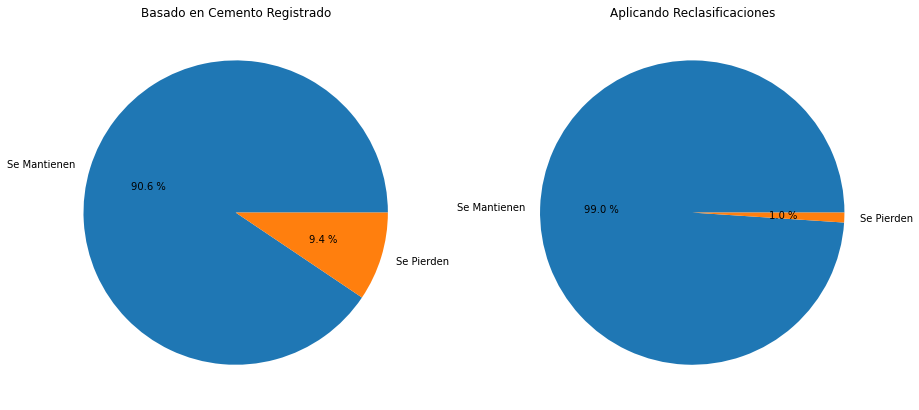

In [8]:
dict1={"Se Mantienen":df1[df1["PLANT_REAL"].notna()].shape[0],
       "Se Pierden":df1[df1["PLANT_REAL"].isna()].shape[0]}
ser1=pd.Series(data=dict1, index=dict1.keys())
dict2={"Se Mantienen":df2[df2["PLANT_REAL"].notna()].shape[0],
       "Se Pierden":df2[df2["PLANT_REAL"].isna()].shape[0]}
ser2=pd.Series(data=dict2, index=dict2.keys())

fig, axes = plt.subplots(1,2)
ser1.plot.pie(ax=axes[0], figsize=(15,15), labels=dict1.keys(),
              autopct="%0.1f %%", title="Basado en Cemento Registrado", ylabel="")
ser2.plot.pie(ax=axes[1], figsize=(15,15), labels=dict2.keys(),
              autopct="%0.1f %%", title="Aplicando Reclasificaciones", ylabel="")
plt.show()

### Revisión de falta de datos con la lógica Original - Tickets/Remisiones

In [9]:
df3=pd.merge(TICKETS,CEMENT_QUALITY_VARIABLES_OLD,
         how="left",
         left_on=["DATE","Plant_Code","Material"],
         right_on=["DATE","PLANT","MATERIAL"])

### Revisión de falta de datos con la lógica Mejorada (ubicando reclasificaciones) - Tickets/Remisiones

In [10]:
df4=pd.merge(TICKETS,CEMENT_QUALITY_VARIABLES,
         how="left",
         left_on=["DATE","Plant_Code","Material"],
         right_on=["DATE","PLANT","MATERIAL"])

### Comparativo - Tickets/Remisiones

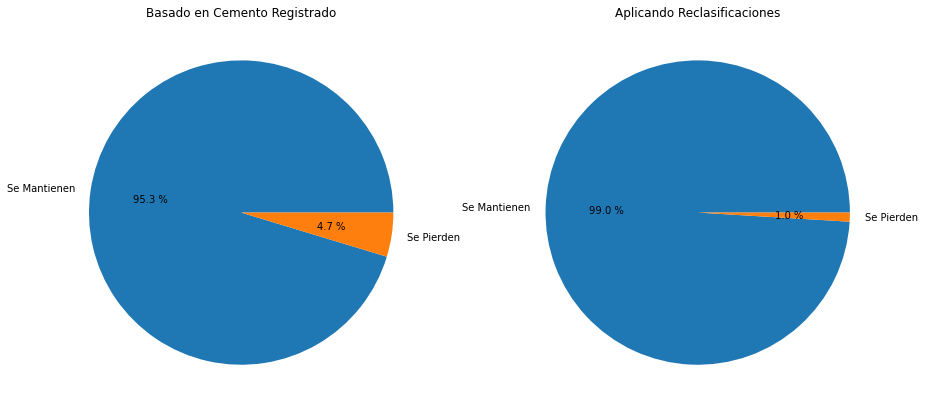

In [11]:
dict3={"Se Mantienen":df3[df3["PLANT_REAL"].notna()].shape[0],
       "Se Pierden":df3[df3["PLANT_REAL"].isna()].shape[0]}
ser3=pd.Series(data=dict3, index=dict3.keys())
dict4={"Se Mantienen":df4[df4["PLANT_REAL"].notna()].shape[0],
       "Se Pierden":df4[df4["PLANT_REAL"].isna()].shape[0]}
ser4=pd.Series(data=dict4, index=dict4.keys())

fig1, axes1 = plt.subplots(1,2)
ser3.plot.pie(ax=axes1[0], figsize=(15,15), labels=dict3.keys(),
              autopct="%0.1f %%", title="Basado en Cemento Registrado", ylabel="")
ser4.plot.pie(ax=axes1[1], figsize=(15,15), labels=dict4.keys(),
              autopct="%0.1f %%", title="Aplicando Reclasificaciones", ylabel="")
plt.show()

### Reclasificacion de Materiales (a nivel combinación)

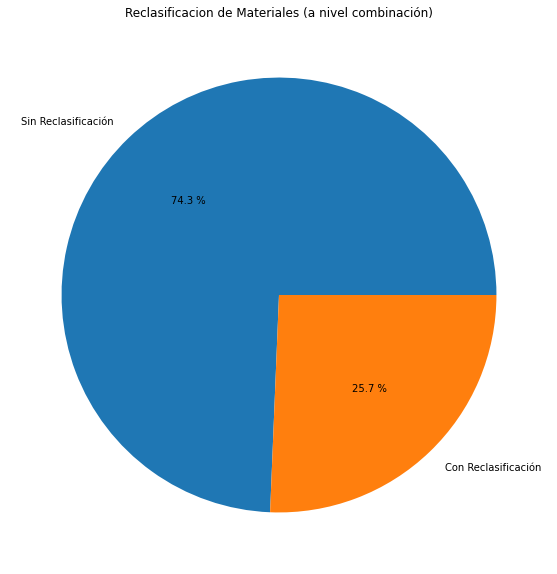

In [12]:
fig2, axes2 = plt.subplots(1)
TOTALS_BY_DATE_AND_ORIGIN["RECLAS"].value_counts().plot.pie(figsize=(10,10),
                                                            labels=["Sin Reclasificación","Con Reclasificación"],
                                                            autopct="%0.1f %%",
                                                            ylabel="",
                                                            title="Reclasificacion de Materiales (a nivel combinación)")
plt.show()

### Reclasificacion de Materiales (a nivel Remisión)

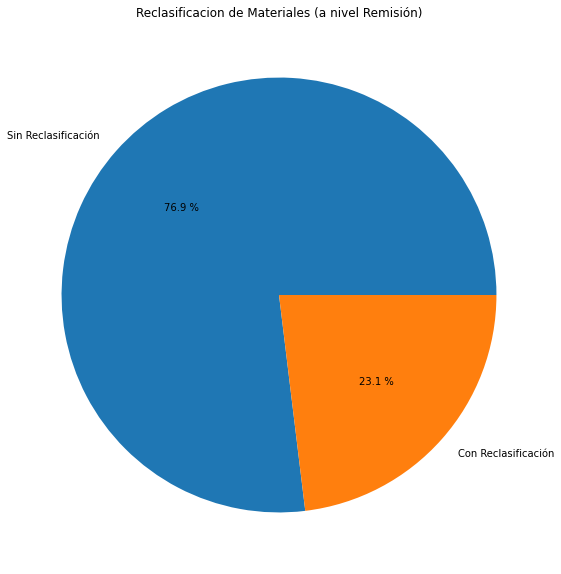

In [13]:
df5=pd.merge(TICKETS[["DATE","Plant_Code","Material","Ticket"]],TOTALS_BY_DATE_AND_ORIGIN[["DATE","KUNNR","MATNR","RECLAS"]],
         how="left",
         left_on=["DATE","Plant_Code","Material"],
         right_on=["DATE","KUNNR","MATNR"])
fig2b, axes2b = plt.subplots(1)
df5["RECLAS"].value_counts().plot.pie(figsize=(10,10),\
                                                            labels=["Sin Reclasificación","Con Reclasificación"],\
                                                            autopct="%0.1f %%",\
                                                            ylabel="",\
                                                            title="Reclasificacion de Materiales (a nivel Remisión)")
plt.show()

### Revisión de Datos Faltantes (NaNs) para cada variable

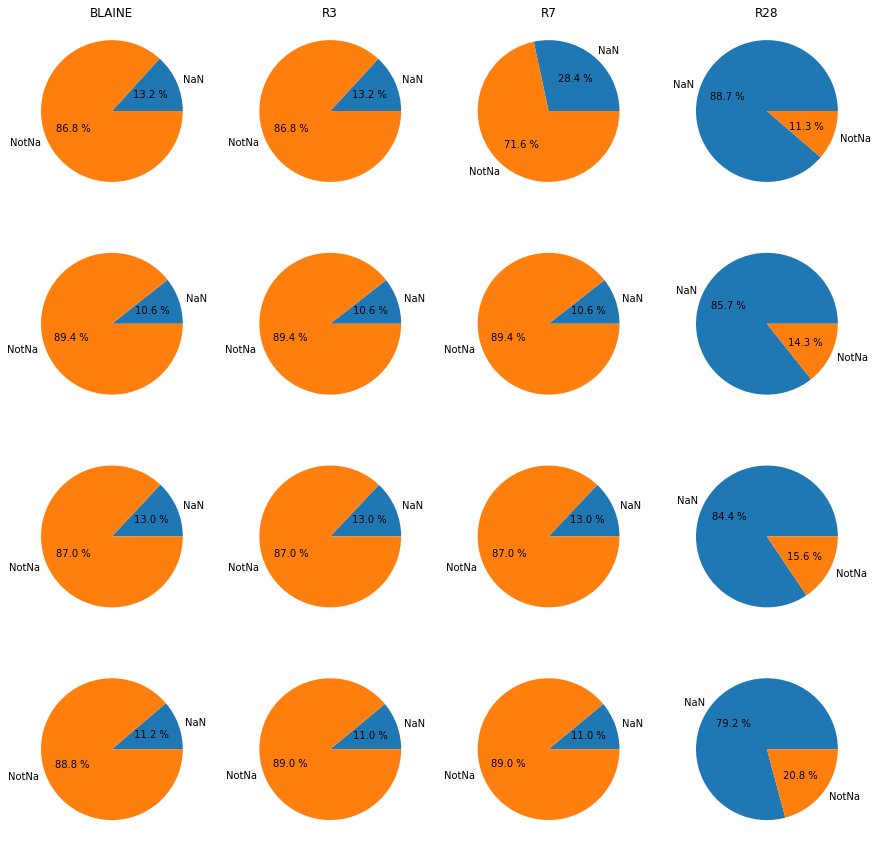

In [14]:
fig3, axes3 = plt.subplots(4,4)

df4[["BLAINE_W1"]].notna()\
                    .value_counts()\
                    .sort_index(ascending=True)\
                    .plot.pie(ax=axes3[0,0],\
                                figsize=(15,15),\
                                labels=["NaN","NotNa"],\
                                autopct="%0.1f %%",\
                                ylabel="",\
                                title="BLAINE")
df4[["R3_W1"]].notna()\
                    .value_counts()\
                    .sort_index(ascending=True)\
                    .plot.pie(ax=axes3[0,1],\
                                figsize=(15,15),\
                                labels=["NaN","NotNa"],\
                                autopct="%0.1f %%",\
                                ylabel="",\
                                title="R3")
df4[["R7_W1"]].notna()\
                    .value_counts()\
                    .sort_index(ascending=True)\
                    .plot.pie(ax=axes3[0,2],\
                                figsize=(15,15),\
                                labels=["NaN","NotNa"],\
                                autopct="%0.1f %%",\
                                ylabel="",\
                                title="R7")
df4[["R28_W1"]].notna()\
                    .value_counts()\
                    .sort_index(ascending=True)\
                    .plot.pie(ax=axes3[0,3],\
                                figsize=(15,15),\
                                labels=["NaN","NotNa"],\
                                autopct="%0.1f %%",\
                                ylabel="",\
                                title="R28")

df4[["BLAINE_W2"]].notna()\
                    .value_counts()\
                    .sort_index(ascending=True)\
                    .plot.pie(ax=axes3[1,0],\
                                figsize=(15,15),\
                                labels=["NaN","NotNa"],\
                                autopct="%0.1f %%",\
                                ylabel="",)
df4[["R3_W2"]].notna()\
                    .value_counts()\
                    .sort_index(ascending=True)\
                    .plot.pie(ax=axes3[1,1],\
                                figsize=(15,15),\
                                labels=["NaN","NotNa"],\
                                autopct="%0.1f %%",\
                                ylabel="")
df4[["R7_W2"]].notna()\
                    .value_counts()\
                    .sort_index(ascending=True)\
                    .plot.pie(ax=axes3[1,2],\
                                figsize=(15,15),\
                                labels=["NaN","NotNa"],\
                                autopct="%0.1f %%",\
                                ylabel="")
df4[["R28_W2"]].notna()\
                    .value_counts()\
                    .sort_index(ascending=True)\
                    .plot.pie(ax=axes3[1,3],\
                                figsize=(15,15),\
                                labels=["NaN","NotNa"],\
                                autopct="%0.1f %%",\
                                ylabel="")

df4[["BLAINE_W3"]].notna()\
                    .value_counts()\
                    .sort_index(ascending=True)\
                    .plot.pie(ax=axes3[2,0],\
                                figsize=(15,15),\
                                labels=["NaN","NotNa"],\
                                autopct="%0.1f %%",\
                                ylabel="")
df4[["R3_W3"]].notna()\
                    .value_counts()\
                    .sort_index(ascending=True)\
                    .plot.pie(ax=axes3[2,1],\
                                figsize=(15,15),\
                                labels=["NaN","NotNa"],\
                                autopct="%0.1f %%",\
                                ylabel="")
df4[["R7_W3"]].notna()\
                    .value_counts()\
                    .sort_index(ascending=True)\
                    .plot.pie(ax=axes3[2,2],\
                                figsize=(15,15),\
                                labels=["NaN","NotNa"],\
                                autopct="%0.1f %%",\
                                ylabel="")
df4[["R28_W3"]].notna()\
                    .value_counts()\
                    .sort_index(ascending=True)\
                    .plot.pie(ax=axes3[2,3],\
                                figsize=(15,15),\
                                labels=["NaN","NotNa"],\
                                autopct="%0.1f %%",\
                                ylabel="")

df4[["BLAINE_W4"]].notna()\
                    .value_counts()\
                    .sort_index(ascending=True)\
                    .plot.pie(ax=axes3[3,0],\
                                figsize=(15,15),\
                                labels=["NaN","NotNa"],\
                                autopct="%0.1f %%",\
                                ylabel="")
df4[["R3_W4"]].notna()\
                    .value_counts()\
                    .sort_index(ascending=True)\
                    .plot.pie(ax=axes3[3,1],\
                                figsize=(15,15),\
                                labels=["NaN","NotNa"],\
                                autopct="%0.1f %%",\
                                ylabel="")
df4[["R7_W4"]].notna()\
                    .value_counts()\
                    .sort_index(ascending=True)\
                    .plot.pie(ax=axes3[3,2],\
                                figsize=(15,15),\
                                labels=["NaN","NotNa"],\
                                autopct="%0.1f %%",\
                                ylabel="")
df4[["R28_W4"]].notna()\
                    .value_counts()\
                    .sort_index(ascending=True)\
                    .plot.pie(ax=axes3[3,3],\
                                figsize=(15,15),\
                                labels=["NaN","NotNa"],\
                                autopct="%0.1f %%",\
                                ylabel="")

plt.show()

### Revisión de Correlaciones entre la Resistencia del Concreto y las Variables de Calidad del Cemento

In [15]:
df4[["NA_3","BLAINE_W1","R3_W1","R7_W1","R28_W1"]].corr() \
                                                    .abs() \
                                                    .style.background_gradient(cmap='coolwarm') \
                                                    .set_precision(2)

,NA_3,BLAINE_W1,R3_W1,R7_W1,R28_W1
NA_3,1.00,0.00,0.02,0.01,0.04
BLAINE_W1,0.00,1.00,0.20,0.26,0.20
R3_W1,0.02,0.20,1.00,0.95,0.86
R7_W1,0.01,0.26,0.95,1.00,0.88
R28_W1,0.04,0.20,0.86,0.88,1.00


In [16]:
df4[["NA_3","BLAINE_W2","R3_W2","R7_W2","R28_W2"]].corr() \
                                                    .abs() \
                                                    .style.background_gradient(cmap='coolwarm') \
                                                    .set_precision(2)

,NA_3,BLAINE_W2,R3_W2,R7_W2,R28_W2
NA_3,1.00,0.00,0.02,0.01,0.05
BLAINE_W2,0.00,1.00,0.24,0.27,0.12
R3_W2,0.02,0.24,1.00,0.96,0.89
R7_W2,0.01,0.27,0.96,1.00,0.91
R28_W2,0.05,0.12,0.89,0.91,1.00


In [17]:
df4[["NA_3","BLAINE_W3","R3_W3","R7_W3","R28_W3"]].corr() \
                                                    .abs() \
                                                    .style.background_gradient(cmap='coolwarm') \
                                                    .set_precision(2)

,NA_3,BLAINE_W3,R3_W3,R7_W3,R28_W3
NA_3,1.00,0.00,0.01,0.01,0.08
BLAINE_W3,0.00,1.00,0.29,0.32,0.31
R3_W3,0.01,0.29,1.00,0.95,0.87
R7_W3,0.01,0.32,0.95,1.00,0.91
R28_W3,0.08,0.31,0.87,0.91,1.00


In [18]:
df4[["NA_3","BLAINE_W4","R3_W4","R7_W4","R28_W4"]].corr() \
                                                    .abs() \
                                                    .style.background_gradient(cmap='coolwarm') \
                                                    .set_precision(2)

,NA_3,BLAINE_W4,R3_W4,R7_W4,R28_W4
NA_3,1.00,0.00,0.01,0.01,0.07
BLAINE_W4,0.00,1.00,0.22,0.25,0.24
R3_W4,0.01,0.22,1.00,0.95,0.86
R7_W4,0.01,0.25,0.95,1.00,0.89
R28_W4,0.07,0.24,0.86,0.89,1.00


In [19]:
df4[["NA_7","BLAINE_W1","R3_W1","R7_W1","R28_W1"]].corr() \
                                                    .abs() \
                                                    .style.background_gradient(cmap='coolwarm') \
                                                    .set_precision(2)

,NA_7,BLAINE_W1,R3_W1,R7_W1,R28_W1
NA_7,1.00,0.03,0.01,0.00,0.06
BLAINE_W1,0.03,1.00,0.20,0.26,0.20
R3_W1,0.01,0.20,1.00,0.95,0.86
R7_W1,0.00,0.26,0.95,1.00,0.88
R28_W1,0.06,0.20,0.86,0.88,1.00


In [20]:
df4[["NA_7","BLAINE_W2","R3_W2","R7_W2","R28_W2"]].corr() \
                                                    .abs() \
                                                    .style.background_gradient(cmap='coolwarm') \
                                                    .set_precision(2)

,NA_7,BLAINE_W2,R3_W2,R7_W2,R28_W2
NA_7,1.00,0.02,0.03,0.02,0.02
BLAINE_W2,0.02,1.00,0.24,0.27,0.12
R3_W2,0.03,0.24,1.00,0.96,0.89
R7_W2,0.02,0.27,0.96,1.00,0.91
R28_W2,0.02,0.12,0.89,0.91,1.00


In [21]:
df4[["NA_7","BLAINE_W3","R3_W3","R7_W3","R28_W3"]].corr() \
                                                    .abs() \
                                                    .style.background_gradient(cmap='coolwarm') \
                                                    .set_precision(2)

,NA_7,BLAINE_W3,R3_W3,R7_W3,R28_W3
NA_7,1.00,0.02,0.02,0.02,0.07
BLAINE_W3,0.02,1.00,0.29,0.32,0.31
R3_W3,0.02,0.29,1.00,0.95,0.87
R7_W3,0.02,0.32,0.95,1.00,0.91
R28_W3,0.07,0.31,0.87,0.91,1.00


In [22]:
df4[["NA_7","BLAINE_W4","R3_W4","R7_W4","R28_W4"]].corr() \
                                                    .abs() \
                                                    .style.background_gradient(cmap='coolwarm') \
                                                    .set_precision(2)

,NA_7,BLAINE_W4,R3_W4,R7_W4,R28_W4
NA_7,1.00,0.02,0.02,0.01,0.06
BLAINE_W4,0.02,1.00,0.22,0.25,0.24
R3_W4,0.02,0.22,1.00,0.95,0.86
R7_W4,0.01,0.25,0.95,1.00,0.89
R28_W4,0.06,0.24,0.86,0.89,1.00


In [23]:
df4[["NA_14","BLAINE_W1","R3_W1","R7_W1","R28_W1"]].corr() \
                                                    .abs() \
                                                    .style.background_gradient(cmap='coolwarm') \
                                                    .set_precision(2)

,NA_14,BLAINE_W1,R3_W1,R7_W1,R28_W1
NA_14,1.00,0.02,0.00,0.00,0.03
BLAINE_W1,0.02,1.00,0.20,0.26,0.20
R3_W1,0.00,0.20,1.00,0.95,0.86
R7_W1,0.00,0.26,0.95,1.00,0.88
R28_W1,0.03,0.20,0.86,0.88,1.00


In [24]:
df4[["NA_14","BLAINE_W2","R3_W2","R7_W2","R28_W2"]].corr() \
                                                    .abs() \
                                                    .style.background_gradient(cmap='coolwarm') \
                                                    .set_precision(2)

,NA_14,BLAINE_W2,R3_W2,R7_W2,R28_W2
NA_14,1.00,0.02,0.01,0.00,0.02
BLAINE_W2,0.02,1.00,0.24,0.27,0.12
R3_W2,0.01,0.24,1.00,0.96,0.89
R7_W2,0.00,0.27,0.96,1.00,0.91
R28_W2,0.02,0.12,0.89,0.91,1.00


In [25]:
df4[["NA_14","BLAINE_W3","R3_W3","R7_W3","R28_W3"]].corr() \
                                                    .abs() \
                                                    .style.background_gradient(cmap='coolwarm') \
                                                    .set_precision(2)

,NA_14,BLAINE_W3,R3_W3,R7_W3,R28_W3
NA_14,1.00,0.02,0.00,0.01,0.03
BLAINE_W3,0.02,1.00,0.29,0.32,0.31
R3_W3,0.00,0.29,1.00,0.95,0.87
R7_W3,0.01,0.32,0.95,1.00,0.91
R28_W3,0.03,0.31,0.87,0.91,1.00


In [26]:
df4[["NA_14","BLAINE_W4","R3_W4","R7_W4","R28_W4"]].corr() \
                                                    .abs() \
                                                    .style.background_gradient(cmap='coolwarm') \
                                                    .set_precision(2)

,NA_14,BLAINE_W4,R3_W4,R7_W4,R28_W4
NA_14,1.00,0.03,0.00,0.00,0.04
BLAINE_W4,0.03,1.00,0.22,0.25,0.24
R3_W4,0.00,0.22,1.00,0.95,0.86
R7_W4,0.00,0.25,0.95,1.00,0.89
R28_W4,0.04,0.24,0.86,0.89,1.00


In [27]:
df4[["NA_28","BLAINE_W1","R3_W1","R7_W1","R28_W1"]].corr() \
                                                    .abs() \
                                                    .style.background_gradient(cmap='coolwarm') \
                                                    .set_precision(2)

,NA_28,BLAINE_W1,R3_W1,R7_W1,R28_W1
NA_28,1.00,0.03,0.05,0.05,0.17
BLAINE_W1,0.03,1.00,0.20,0.26,0.20
R3_W1,0.05,0.20,1.00,0.95,0.86
R7_W1,0.05,0.26,0.95,1.00,0.88
R28_W1,0.17,0.20,0.86,0.88,1.00


In [28]:
df4[["NA_28","BLAINE_W2","R3_W2","R7_W2","R28_W2"]].corr() \
                                                    .abs() \
                                                    .style.background_gradient(cmap='coolwarm') \
                                                    .set_precision(2)

,NA_28,BLAINE_W2,R3_W2,R7_W2,R28_W2
NA_28,1.00,0.02,0.04,0.05,0.12
BLAINE_W2,0.02,1.00,0.24,0.27,0.12
R3_W2,0.04,0.24,1.00,0.96,0.89
R7_W2,0.05,0.27,0.96,1.00,0.91
R28_W2,0.12,0.12,0.89,0.91,1.00


In [29]:
df4[["NA_28","BLAINE_W3","R3_W3","R7_W3","R28_W3"]].corr() \
                                                    .abs() \
                                                    .style.background_gradient(cmap='coolwarm') \
                                                    .set_precision(2)

,NA_28,BLAINE_W3,R3_W3,R7_W3,R28_W3
NA_28,1.00,0.02,0.04,0.06,0.15
BLAINE_W3,0.02,1.00,0.29,0.32,0.31
R3_W3,0.04,0.29,1.00,0.95,0.87
R7_W3,0.06,0.32,0.95,1.00,0.91
R28_W3,0.15,0.31,0.87,0.91,1.00


In [30]:
df4[["NA_28","BLAINE_W4","R3_W4","R7_W4","R28_W4"]].corr() \
                                                    .abs() \
                                                    .style.background_gradient(cmap='coolwarm') \
                                                    .set_precision(2)

,NA_28,BLAINE_W4,R3_W4,R7_W4,R28_W4
NA_28,1.00,0.02,0.05,0.06,0.11
BLAINE_W4,0.02,1.00,0.22,0.25,0.24
R3_W4,0.05,0.22,1.00,0.95,0.86
R7_W4,0.06,0.25,0.95,1.00,0.89
R28_W4,0.11,0.24,0.86,0.89,1.00


### Tratar de identificar relación entre la NA_28 y la R28_W1

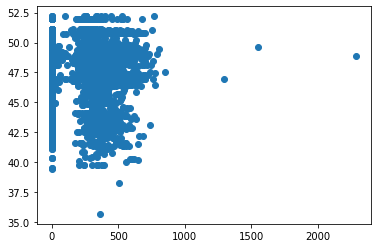

In [31]:
plt.scatter(df4.NA_28,
            df4.R28_W1)

### Eliminar los casos en los que la NA_28 es 0 o mayor o igual a 1000

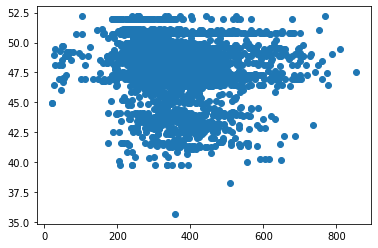

In [32]:
plt.scatter(df4[(df4["NA_28"]>0)&(df4["NA_28"]<1000)].NA_28,
            df4[(df4["NA_28"]>0)&(df4["NA_28"]<1000)].R28_W1)

### Explorar aplicando una transformación Logarítmica

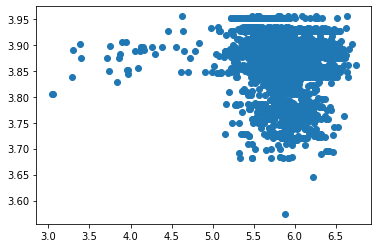

In [33]:
plt.scatter(np.log(df4[(df4["NA_28"]>0)&(df4["NA_28"]<1000)].NA_28),
            np.log(df4[(df4["NA_28"]>0)&(df4["NA_28"]<1000)].R28_W1))

### Obtener la Correlación de Pearson mediante la definición y uso de funciones

In [34]:
def de_mean(x):
    x_bar = np.mean(x)
    return [x_i - x_bar for x_i in x]

def covariance(x, y):    
    n = len(x)    
    return np.dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):    
    std_x = np.std(x)    
    std_y = np.std(y)    
    if std_x > 0 and std_y > 0:        
        return covariance(x, y) / (std_x * std_y)        # we can also return covariance(x, y) / std_x / std_y    
    else:
        return 0

In [35]:
print('El nivel de correlación entre NA_28 y R28_W1 utilizando el método de Pearson es: ',
      correlation(df4[(df4["NA_28"]>0)&(df4["NA_28"]<1000)].dropna().NA_28,
                  df4[(df4["NA_28"]>0)&(df4["NA_28"]<1000)].dropna().R28_W1))

El nivel de correlación entre NA_28 y R28_W1 utilizando el método de Pearson es:  -0.14516418557125854
